In [1]:
### PACKAGE IMPORT AND VARIABLE DEFINITION ####################################

# import necessary packages
import components as cp
import numpy.random as nr
# import truncating_functions
import numpy as np
import Model
import pandas as pd
import matplotlib.pyplot as plt
import Simulator as sc
import TruncatingFunctions as tr
# from scipy.stats import trapz

# create models
model = Model.Model('Organic matter 1985-2016')

RUNS = 10000

startYear = 1985 # starting year
Tperiods = 33 # total number of periods modelled
Speriod = 28 # for 2013
periodRange = np.arange(0,Tperiods)

mylightgreen  = '#CAFFC5'
mygreen       = '#73F467'
mydarkgreen   = '#10A900'

print("Modules imported")
print("Number of runs = "+str(RUNS))

Modules imported
Number of runs = 10000


In [2]:
### COMPARTMENT DEFINITION ####################################################

collection          = cp.FlowCompartment('Organic waste collection', logInflows=True, logOutflows=True)

anaerobicdigestion  = cp.FlowCompartment('AD plant',           logInflows=True, logOutflows=True, categories=['Treatment'])
composting          = cp.FlowCompartment('Composting plant',   logInflows=True, logOutflows=True, categories=['Treatment'])
windrowcomposting   = cp.FlowCompartment('Windrow composting', logInflows=True, logOutflows=True, categories=['Treatment'])
codigestion         = cp.FlowCompartment('Codigestion',        logInflows=True, logOutflows=True, categories=['Treatment'])

anaerobicdigestionprod = cp.FlowCompartment('Digestate produced from AD',          logInflows=True, logOutflows=True, categories=['Production'])
compostingprod         = cp.FlowCompartment('Compost produced from composting',    logInflows=True, logOutflows=True, categories=['Production'])
windrowcompostingprod  = cp.FlowCompartment('Compost produced from windrows',      logInflows=True, logOutflows=True, categories=['Production'])
codigestionprod        = cp.FlowCompartment('Digestate produced from codigestion', logInflows=True, logOutflows=True, categories=['Production'])

losses              = cp.Sink('Losses',         logInflows=True)
residues            = cp.Sink('Residues',       logInflows=True)
other               = cp.Sink('Other products', logInflows=True)

agriculture         = cp.Sink('Agriculture',  logInflows=True, categories=['Environment'])
horticulture        = cp.Sink('Horticulture', logInflows=True, categories=['Environment'])
gardening           = cp.Sink('Gardening',    logInflows=True, categories=['Environment'])

# create the list of compartments
compartmentList = [collection,
                   anaerobicdigestion,     composting,     windrowcomposting,     codigestion,
                   anaerobicdigestionprod, compostingprod, windrowcompostingprod, codigestionprod,
                   agriculture, horticulture, gardening,
                   losses, residues, other]

# input into model                 
model.setCompartments(compartmentList)

print("Compartments defined")

Compartments defined


C:\Users\dew\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


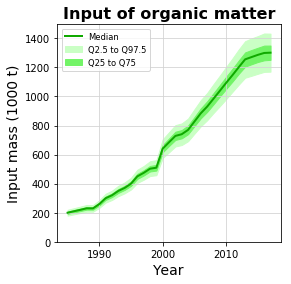

In [3]:
### INPUT DATA ############################################################################################################################################################

# organic matter collected: time series
Productiondata = pd.read_csv('C:/Users/dew/Documents/Polybox/Projects/2018.10 Compost/Flows/20190705_STAN_Jupyter_TCDynamics/Jupyter/Input_OM.csv',
                             header=None, sep = ';')
# convert to matrix
Productiondata = Productiondata.as_matrix()
#Productiondata = Productiondata.values

# create a triangular distribution around the central imported values
Input = []
for i in periodRange:
    Input.append(nr.triangular(Productiondata[i,1]*(1-0.13),
                               Productiondata[i,1],
                               Productiondata[i,1]*(1+0.13),
                               RUNS))

model.addInflow(cp.ExternalListInflow(collection, [cp.RandomChoiceInflow(Input[x]) for x in periodRange]))

##### PLOT THE INPUT ##########################

median=[]                                       
q25=[]
q75=[]
qlow=[]
qhigh=[]
for col in Input:
    median.append(np.median(col)/1000)
    q25.append(np.percentile(col,25)/1000)
    q75.append(np.percentile(col,75)/1000)
    qlow.append(np.percentile(col,2.5)/1000)
    qhigh.append(np.percentile(col,97.5)/1000)

# create a new figure
fig = plt.figure('COLL',figsize=(4, 4)) 
plt.xlabel('Year',fontsize=14)
plt.ylabel('Input mass (1000 t)',fontsize=14)
plt.fill_between(periodRange+startYear, qlow, qhigh, color=mylightgreen, label="Q2.5 to Q97.5")
plt.fill_between(periodRange+startYear, q25, q75, color=mygreen, label="Q25 to Q75")
plt.plot(periodRange+startYear, median, color = mydarkgreen, linewidth=2, label='Median')
plt.ylim(bottom=0)
plt.grid(color='lightgrey')
plt.legend(loc='upper left', fontsize = 'small')
plt.title('Input of organic matter', size=16, fontweight="bold")
fig.savefig('Plots/Input_OM.pdf', bbox_inches='tight')

In [4]:
if False :
    collection.transfers = [cp.TimeDependendDistributionTransfer([cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1]),
                                                              cp.TransferDistribution(TriangTrunc, [0.4, 0.199, 1, 0, 1])],
                                                                 anaerobicdigestion, collection, priority=2),
                          cp.ConstTransfer(1, tires_othermat, priority=1)]

In [5]:
### TRANSFER COEFFICIENTS ORGANIC MATTER #####################################################

collection.transfers = [cp.StochasticTransfer(tr.TriangTrunc, [0.388,0.054,1,0,1], anaerobicdigestion),
                        cp.StochasticTransfer(tr.TriangTrunc, [0.420,0.054,1,0,1], composting),
                        cp.StochasticTransfer(tr.TriangTrunc, [0.079,0.054,1,0,1], windrowcomposting),
                        cp.StochasticTransfer(tr.TriangTrunc, [0.110,0.054,1,0,1], codigestion),
                        cp.StochasticTransfer(tr.TriangTrunc, [0.003,0.054,1,0,1], losses)]

composting.transfers = [cp.StochasticTransfer(tr.TriangTrunc, [0.490,0.22,1,0,1], compostingprod, priority=2),
                        cp.StochasticTransfer(tr.TriangTrunc, [0.02,0.5,1,0,1], residues, priority=2),
                        cp.ConstTransfer(1, other, priority=1)]

anaerobicdigestion.transfers = [cp.StochasticTransfer(tr.TriangTrunc, [0.136,0.21,1,0,1], anaerobicdigestionprod, priority=2),
                                cp.StochasticTransfer(tr.TriangTrunc, [0.06,1.00,1,0,1], residues, priority=2),
                                cp.ConstTransfer(1, other, priority=1)]

windrowcomposting.transfers = [cp.StochasticTransfer(tr.TriangTrunc, [0.55,0.22,1,0,1], windrowcompostingprod, priority=2),
                               cp.StochasticTransfer(tr.TriangTrunc, [0.02,0.5,1,0,1], residues, priority=2),
                               cp.ConstTransfer(1, other, priority=1)]

codigestion.transfers = [cp.StochasticTransfer(tr.TriangTrunc, [0.027,0.21,1,0,1], codigestionprod, priority=2),
                         cp.StochasticTransfer(tr.TriangTrunc, [0.02,0.5,1,0,1], residues, priority=2),
                         cp.ConstTransfer(1, other, priority=1)]

# some priorities are modified because of the truncation-mean translocation problem
compostingprod.transfers = [cp.StochasticTransfer(tr.TriangTrunc, [0.63,0.29,1,0,1], agriculture),
                            cp.StochasticTransfer(tr.TriangTrunc, [0.30,0.29,1,0,1], horticulture),
                            cp.StochasticTransfer(tr.TriangTrunc, [0.07,0.29,1,0,1], gardening)]

anaerobicdigestionprod.transfers = [cp.StochasticTransfer(tr.TriangTrunc, [0.59,0.28,1,0,1], agriculture),
                                    cp.StochasticTransfer(tr.TriangTrunc, [0.34,0.29,1,0,1], horticulture),
                                    cp.StochasticTransfer(tr.TriangTrunc, [0.07,0.29,1,0,1], gardening)]

windrowcompostingprod.transfers = [cp.StochasticTransfer(tr.TriangTrunc, [0.9,0.29,1,0,1], agriculture, priority=1),
                                   cp.StochasticTransfer(tr.TriangTrunc, [0.09,0.30,1,0,1], horticulture, priority=2),
                                   cp.StochasticTransfer(tr.TriangTrunc, [0.01,0.31,1,0,1], gardening, priority=2)]

codigestionprod.transfers = [cp.StochasticTransfer(tr.TriangTrunc, [0.11,0.29,1,0,1], agriculture, priority=2),
                             cp.StochasticTransfer(tr.TriangTrunc, [0.82,0.28,1,0,1], horticulture, priority=1),
                             cp.StochasticTransfer(tr.TriangTrunc, [0.07,0.28,1,0,1], gardening, priority=2)]

In [6]:
#################### RUN THE MODEL: ORGANIC MATTER #######################

# check validity
model.checkModelValidity()
# set up the simulator object
sim = sc.Simulator(RUNS, Tperiods, 2250, True, True) # 2250 is just a seed
# define what model  needs to be run
sim.setModel(model)
# run the model
sim.runSimulation()


Start Simulation
Model: Organic matter 1985-2016
Seed Value: 2250
Number of Simulation Runs: 10000
Number of Periods: 33
Progress (in percent):
1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,  
Simulation complete



In [7]:
# find out the sinks and the stocks of the system
sinks  = sim.getSinks()
stocks = sim.getStocks()

In [8]:
#### ORGANIC MATTER FLOWS

# compartment with loggedInflows
loggedInflows = sim.getLoggedInflows() 
# compartment with loggedOutflows
loggedOutflows = sim.getLoggedOutflows()

## display mean ± std for each flow
print 'Logged outflows for year '+str(Speriod+startYear)+':'
print '-----------------------'
print ''
# loop over the list of compartments with loggedoutflows
for Comp in loggedOutflows:
    print 'Flows from ' + Comp.name +':' 
    # in this case name is the key, value is the matrix(data), in this case .items is needed
    for Target_name, value in Comp.outflowRecord.items():
        print ' --> ' + str(Target_name)+ ': Mean = '+str(round(np.mean(value[:,Speriod]),0))+' ± '+str(round(np.std(value[:,Speriod]),0))   
    print''
print '-----------------------'
print ''

Logged outflows for year 2013:
-----------------------

Flows from Organic waste collection:
 --> Composting plant: Mean = 526400.0 ± 29503.0
 --> Losses: Mean = 3759.0 ± 225.0
 --> Codigestion: Mean = 137899.0 ± 8128.0
 --> AD plant: Mean = 486191.0 ± 27383.0
 --> Windrow composting: Mean = 99002.0 ± 5823.0

Flows from AD plant:
 --> Other products: Mean = 390834.0 ± 25654.0
 --> Digestate produced from AD: Mean = 66035.0 ± 6776.0
 --> Residues: Mean = 29322.0 ± 12143.0

Flows from Composting plant:
 --> Compost produced from composting: Mean = 257957.0 ± 27369.0
 --> Other products: Mean = 257961.0 ± 27119.0
 --> Residues: Mean = 10481.0 ± 2240.0

Flows from Windrow composting:
 --> Compost produced from windrows: Mean = 54446.0 ± 5777.0
 --> Other products: Mean = 42569.0 ± 5485.0
 --> Residues: Mean = 1987.0 ± 417.0

Flows from Codigestion:
 --> Other products: Mean = 131419.0 ± 7765.0
 --> Residues: Mean = 2758.0 ± 594.0
 --> Digestate produced from codigestion: Mean = 3723.0 ± 38

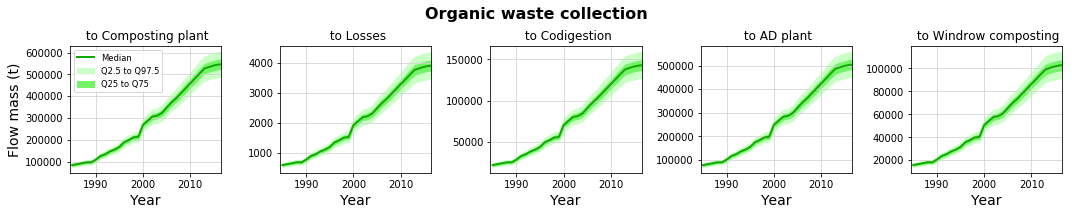

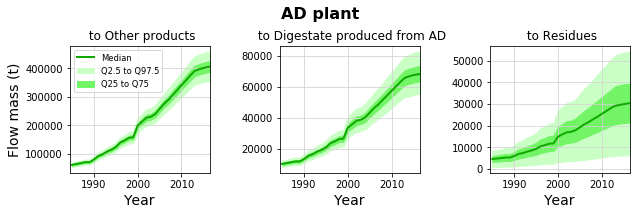

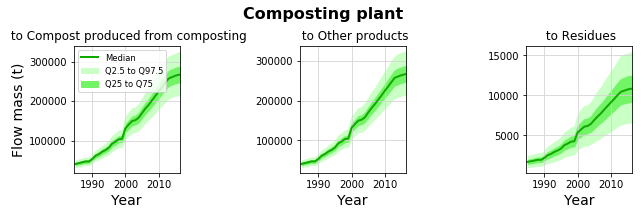

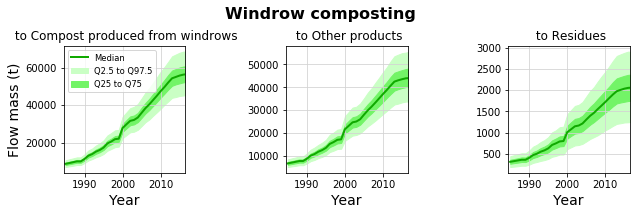

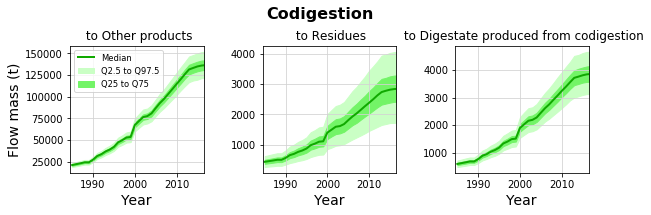

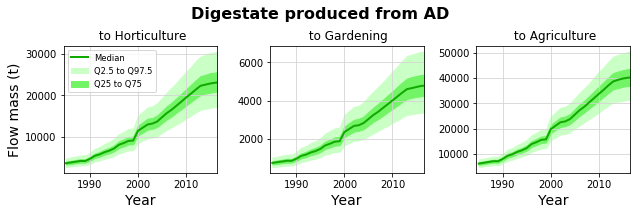

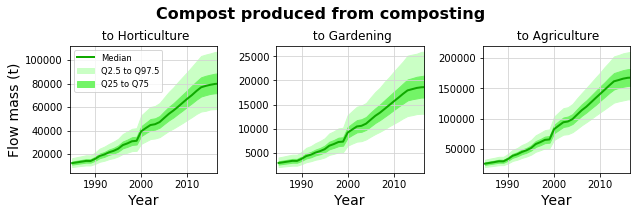

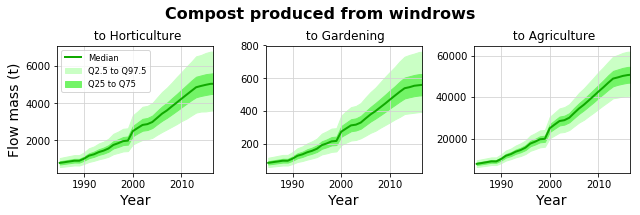

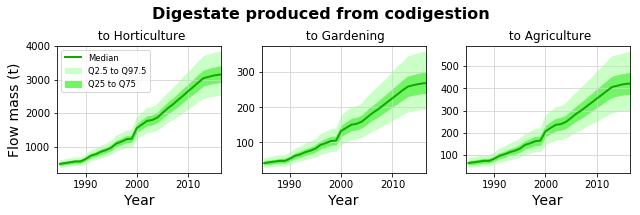

In [9]:
# ONE FIGURE PER OUTFLOW COMPARTMENT
for Comp in loggedOutflows:
    
    nplots = len(Comp.outflowRecord.items())
    fig, axs = plt.subplots(1, int(nplots), figsize=(int(nplots)*3, 3))

    j = 0

    for Target_name, value in Comp.outflowRecord.items():
        
        median=[]                                       
        q25=[]
        q75=[]
        qlow=[]
        qhigh=[]
        
        for i in range(0,np.shape(value)[1]):
            median.append(np.median(value[:,i]))
            q25.append(np.percentile(value[:,i],25))
            q75.append(np.percentile(value[:,i],75))
            qlow.append(np.percentile(value[:,i],2.5))
            qhigh.append(np.percentile(value[:,i],97.5))
        
        # create a new plot
        axs[j].fill_between(periodRange+startYear, qlow, qhigh, color=mylightgreen, label="Q2.5 to Q97.5")
        axs[j].fill_between(periodRange+startYear, q25, q75, color=mygreen, label="Q25 to Q75")
        axs[j].plot(periodRange+startYear,median, color = mydarkgreen, linewidth=2, label='Median')
        axs[j].set_title(' to '+str(Target_name))
        axs[j].set_xlabel('Year',fontsize=14)
        if j==0: axs[j].set_ylabel('Flow mass (t)',fontsize=14)
        axs[j].grid(color='lightgrey')
        #axs[j].rcParams['font.size']=12 # tick's font
        axs[j].set_xlim([1984.5, 2016.5])
        if j==0: axs[j].legend(loc='upper left', fontsize = 'small')
        
        fig.suptitle(str(Comp.name), size=16, y=0.98, fontweight="bold") # or plt.suptitle('Main title')   
        fig.tight_layout()
        plt.subplots_adjust(top=0.8)
        
        plt.savefig('Plots/Flows_OM_'+Comp.name+'.pdf')
        
        j = j+1

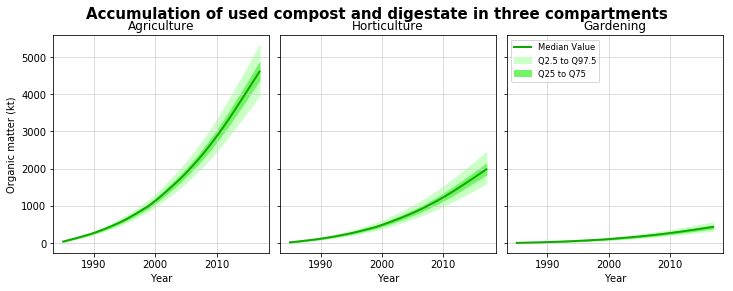

In [10]:
# put the stocked material in an object
StockedMaterial = sim.getAllStockedMaterial()

# create three subplots and save the tuple as two variables
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

for ax, comp in zip([ax1, ax2, ax3], ['Agriculture', 'Horticulture', 'Gardening']):
    
    median=[]                                       
    q25=[]
    q75=[]
    qlow=[]
    qhigh=[]
    
    for i in np.arange(0,33):
        median.append(np.median(StockedMaterial[comp][:,i])/1000)
        q25.append(np.percentile(StockedMaterial[comp][:,i],25)/1000)
        q75.append(np.percentile(StockedMaterial[comp][:,i],75)/1000)
        qlow.append(np.percentile(StockedMaterial[comp][:,i],2.5)/1000)
        qhigh.append(np.percentile(StockedMaterial[comp][:,i],97.5)/1000)

    ax.fill_between(periodRange+startYear, qlow, qhigh, color=mylightgreen, label="Q2.5 to Q97.5")
    ax.fill_between(periodRange+startYear, q25, q75, color=mygreen, label="Q25 to Q75")
    ax.plot(periodRange+startYear, median, color = mydarkgreen
            , linewidth=2, label='Median Value')
    ax.grid(color='lightgrey')
    ax.set_title(comp)
    ax.set_xlabel('Year')
    if comp == "Agriculture":
        ax.set_ylabel('Organic matter (kt)')
    if comp == "Gardening":
        ax.legend(loc='upper left', fontsize = 'small')

# reduce the space in horizontal direction
fig.subplots_adjust(wspace=0.05)
# main title
fig.suptitle('Accumulation of used compost and digestate in three compartments', fontsize=15, weight='bold')
# export
fig.savefig('Plots/TimeSeries_Stocks_OM.pdf', bbox_inches='tight')
